In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import tensorflow as tf
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
data=pd.read_csv('NSE-TATAGLOBAL11.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [4]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [6]:
data.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


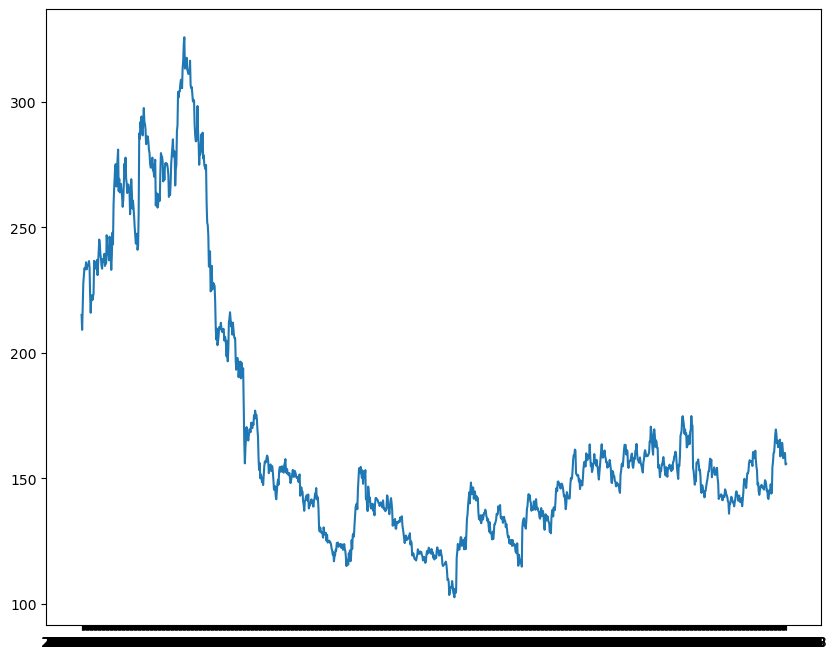

In [7]:
#plotting graph for data and close
plt.figure(figsize=(10,8))
plt.plot(data['Date'],data['Close'])

In [8]:

closed=data['Close']
closed

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

In [9]:
scalar=MinMaxScaler(feature_range=(0,1))
closed=scalar.fit_transform(np.array(closed).reshape(-1,1))
closed

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [10]:
train_size=int(len(closed)*0.7)
test_size=len(closed)-train_size

train,test=closed[0:train_size,:],closed[train_size:len(closed),:1]


In [11]:
train.shape,test.shape


((864, 1), (371, 1))

In [12]:
#converting array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax,dtype=np.float32),np.array(datay,dtype=np.float32)


In [13]:
time_step=100
x_train,y_train=create_dataset(train,time_step)
x_test,y_test=create_dataset(test,time_step)

In [14]:
y_train.shape

(763,)

In [15]:
#reshaping dataset
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [16]:
#creating LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#converting ndarray to tensor
x_train=tf.convert_to_tensor(x_train)
y_train=tf.convert_to_tensor(y_train)

In [19]:
#training model
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)


Epoch 1/60
11/11 [==============================] - 9s 315ms/step - loss: 0.0555 - val_loss: 0.0045
Epoch 2/60
11/11 [==============================] - 2s 200ms/step - loss: 0.0108 - val_loss: 0.0014
Epoch 3/60
11/11 [==============================] - 2s 201ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 4/60
11/11 [==============================] - 3s 244ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 5/60
11/11 [==============================] - 3s 249ms/step - loss: 0.0026 - val_loss: 7.6917e-04
Epoch 6/60
11/11 [==============================] - 3s 251ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 7/60
11/11 [==============================] - 3s 258ms/step - loss: 0.0026 - val_loss: 8.0346e-04
Epoch 8/60
11/11 [==============================] - 3s 252ms/step - loss: 0.0024 - val_loss: 7.2818e-04
Epoch 9/60
11/11 [==============================] - 3s 250ms/step - loss: 0.0023 - val_loss: 6.5944e-04
Epoch 10/60
11/11 [==============================] - 3s 253ms/step - loss: 0.0023 - 

In [20]:
#prediction from data
train_predicted=model.predict(x_train)
predicted=model.predict(x_test)


9/9 [==============================] - 0s 49ms/step


In [21]:
train_predicted=scalar.inverse_transform(train_predicted)
predicted=scalar.inverse_transform(predicted)

In [22]:
#checking performance
print("root mean squared error",np.sqrt(mean_squared_error(y_test,predicted)))


root mean squared error 151.97661


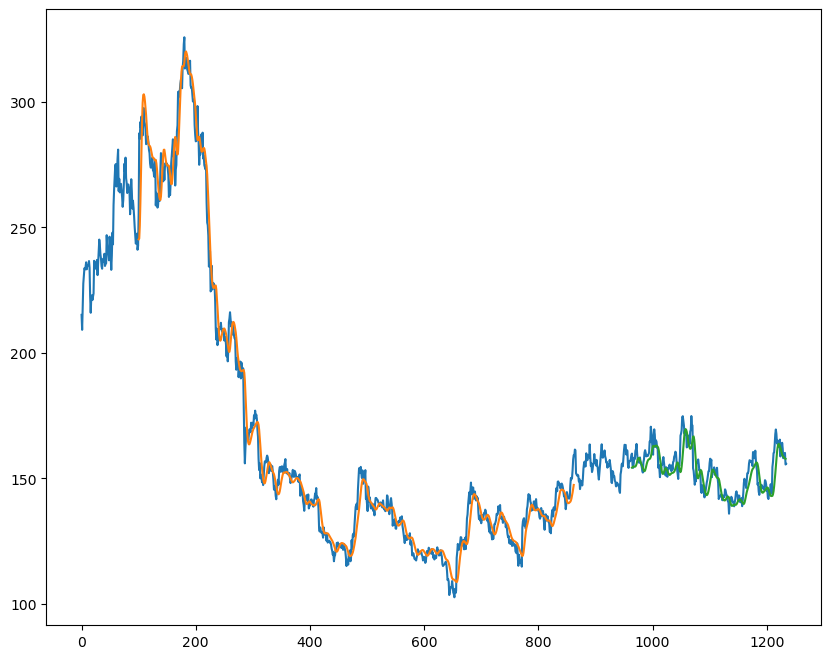

In [23]:
#plotting graph for train,test and actual data

look_back=100

train_predictedplt=np.empty_like(closed)
train_predictedplt[:,:]=np.nan
train_predictedplt[look_back:len(train_predicted)+look_back,:]=train_predicted

predictedplt=np.empty_like(closed)
predictedplt[:,:]=np.nan
predictedplt[len(train_predicted)+(look_back*2)+1:len(closed)-1,:]=predicted


plt.figure(figsize=(10,8))
plt.plot(scalar.inverse_transform(closed))
plt.plot(train_predictedplt)
plt.plot(predictedplt)
plt.show()

In [24]:
len(test)

371

In [26]:
#predicting for next 20 days
predicted_input=test[290:].reshape(1,-1)
predicted_input.shape

(1, 81)

In [27]:
temp_input=list(predicted_input)
temp_input=temp_input[0].tolist()


In [28]:
temp_input

[0.17189601075750777,
 0.16943074854325407,
 0.1770506499327656,
 0.16270730614074397,
 0.17346481398476016,
 0.18646346929627972,
 0.20416853428955622,
 0.2115643209323173,
 0.20259973106230383,
 0.204616763783057,
 0.19520394441954275,
 0.20797848498431198,
 0.2214253697893322,
 0.2214253697893322,
 0.22523532048408784,
 0.23890632003585827,
 0.24473330345136707,
 0.2440609592111161,
 0.24137158225011207,
 0.24271627073061414,
 0.24069923800986098,
 0.23442402510085153,
 0.2593007619901389,
 0.2590766472433886,
 0.25616315553563423,
 0.2483191393993725,
 0.2617660242043927,
 0.24473330345136707,
 0.2333034513670999,
 0.22613177947108914,
 0.20103092783505155,
 0.20416853428955622,
 0.18870461676378308,
 0.18287763334827428,
 0.1904975347377858,
 0.19766920663379645,
 0.19878978036754819,
 0.20080681308830112,
 0.19744509188704612,
 0.19520394441954275,
 0.1972209771402958,
 0.19229045271178852,
 0.19789332138054688,
 0.20909905871806372,
 0.207306140744061,
 0.20170327207530253,
 0.1

In [29]:
output=[]#for next 20 days
n_steps=81
i=0
while(i<20):
    if(len(temp_input)>81):
        predicted_input=np.array(temp_input[1:])
        predicted_input=predicted_input.reshape(1,-1)
        predicted_input=predicted_input.reshape((1,n_steps,1))
        new_predicted=model.predict(predicted_input,verbose=0)
        print(i,"day output",new_predicted)
        temp_input.extend(new_predicted[0].tolist())
        temp_input=temp_input[1:]
        output.extend(new_predicted.tolist())
        i+=1
    else:
        predicted_input=predicted_input.reshape((1,n_steps,1))
        new_predicted=model.predict(predicted_input,verbose=0)
        print(new_predicted[0])
        temp_input.extend(new_predicted[0].tolist())
        print(len(temp_input))
        output.extend(new_predicted.tolist())
        i+=1
        
print(output)
    
    

[0.2436437]
82
1 day output [[0.24129072]]
2 day output [[0.23903628]]
3 day output [[0.2369701]]
4 day output [[0.23508775]]
5 day output [[0.23334816]]
6 day output [[0.23170443]]
7 day output [[0.23011772]]
8 day output [[0.22856067]]
9 day output [[0.22701584]]
10 day output [[0.22547328]]
11 day output [[0.22392796]]
12 day output [[0.2223776]]
13 day output [[0.22082187]]
14 day output [[0.21926127]]
15 day output [[0.21769704]]
16 day output [[0.21613075]]
17 day output [[0.21456434]]
18 day output [[0.21299993]]
19 day output [[0.21143956]]
[[0.24364370107650757], [0.24129071831703186], [0.23903627693653107], [0.23697009682655334], [0.23508775234222412], [0.23334816098213196], [0.23170442879199982], [0.23011772334575653], [0.228560671210289], [0.22701583802700043], [0.2254732847213745], [0.22392795979976654], [0.22237759828567505], [0.22082187235355377], [0.2192612737417221], [0.21769703924655914], [0.21613074839115143], [0.21456433832645416], [0.21299992501735687], [0.21143956

In [30]:
#plotting for last 101 days closing price
new_day=np.arange(1,81)
predicted_day=np.arange(81,101)


In [31]:
len(closed)

1235

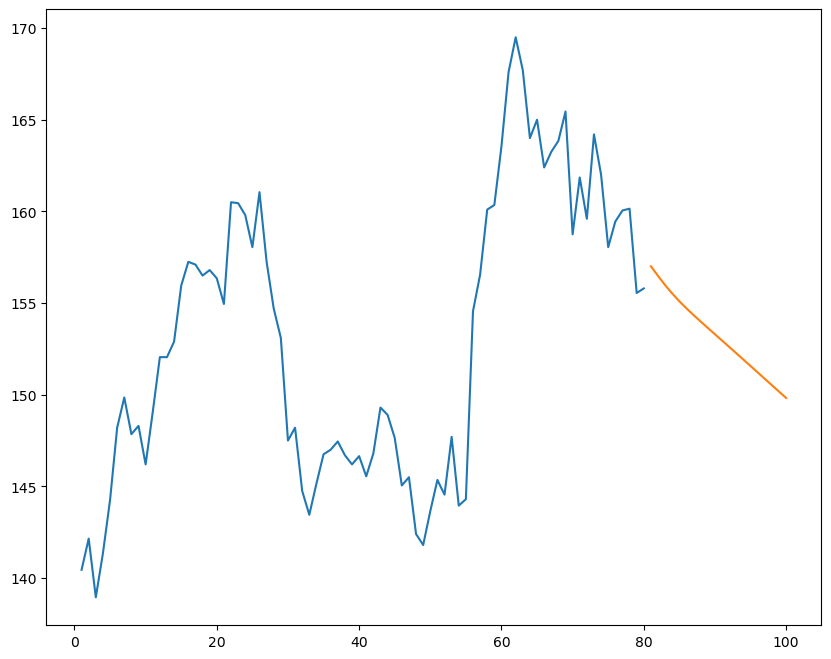

In [34]:
plt.figure(figsize=(10,8))
plt.plot(new_day,scalar.inverse_transform(closed[1155:]))
plt.plot(predicted_day,scalar.inverse_transform(output))


In [35]:
#appending to get continous graph
new_data=closed.tolist()
new_data.extend(output)

In [36]:
len(new_data)

1255

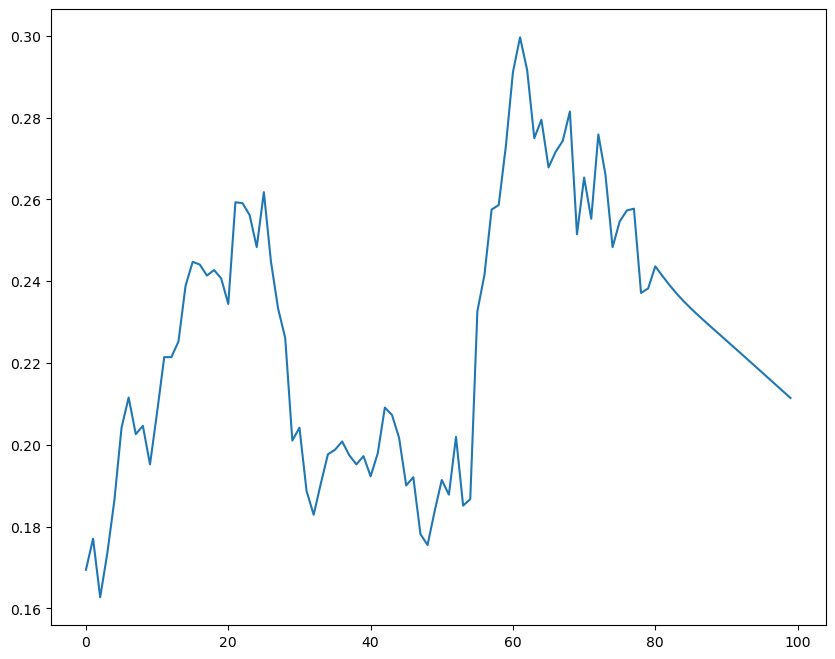

In [38]:
plt.figure(figsize=(10,8))
plt.plot(new_data[1155:])


In [39]:
#plotting for 20 predicted days
new_data=scalar.inverse_transform(new_data).tolist()


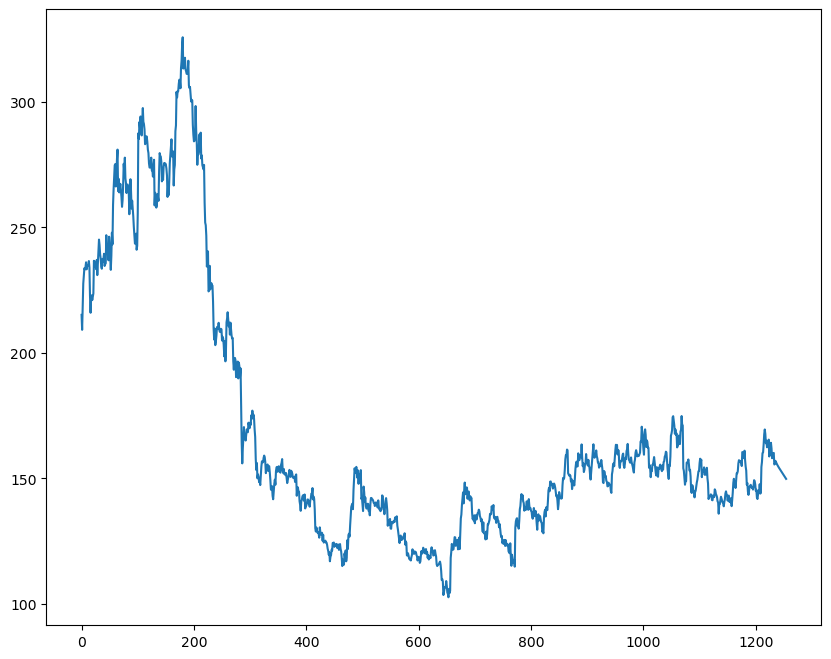

In [41]:
plt.figure(figsize=(10,8))
plt.plot(new_data)